In [1]:
import math
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from common import Fonts, Images, NWSL, Colors, add_twitter_handle, add_source

In [2]:
df = pd.read_csv("final.csv")
df

,team,season,points
0,BOS,2013,"[1, 4, 7, 8, 8, 11, 11, 12, 12, 12, 12, 15, 16..."
1,CHI,2013,"[1, 1, 1, 2, 2, 2, 5, 8, 8, 11, 12, 12, 15, 18..."
2,KC,2013,"[1, 4, 7, 7, 10, 10, 10, 13, 16, 16, 19, 20, 2..."
3,NJY,2013,"[3, 6, 6, 7, 10, 13, 16, 19, 22, 22, 25, 26, 2..."
4,POR,2013,"[1, 4, 7, 10, 13, 13, 16, 19, 19, 22, 25, 26, ..."
...,...,...,...
93,ORL,2023,"[0, 0, 0, 0, 3, 6, 7, 10, 10, 10, 13, 13, 13, ..."
94,POR,2023,"[3, 6, 7, 10, 11, 12, 12, 15, 16, 19, 19, 22, ..."
95,RGN,2023,"[0, 3, 6, 9, 10, 13, 13, 13, 16, 16, 19, 20, 2..."
96,SD,2023,"[3, 6, 6, 9, 9, 9, 12, 15, 16, 19, 20, 20, 20,..."


In [3]:
df["season"].unique()

array([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2021, 2022, 2023])

<Figure size 5200x4000 with 0 Axes>

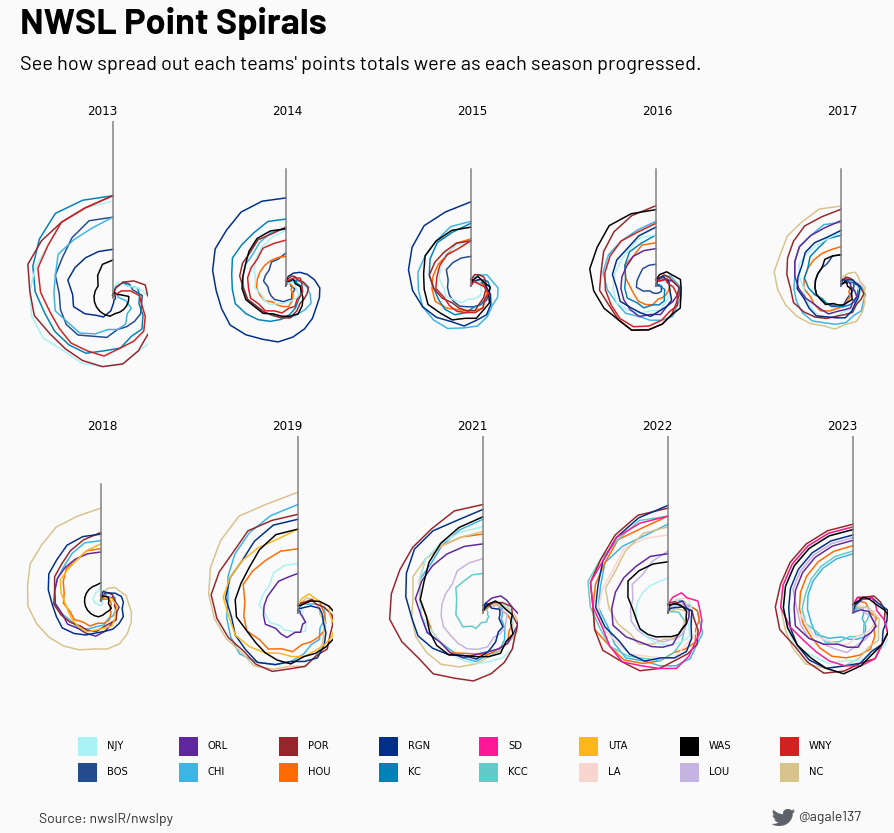

In [37]:
# Setup
plt.rcParams["figure.figsize"] = (13, 10)
plt.figure(dpi=400)
fig, axs = plt.subplots(3, 5, height_ratios=[6, 6, 1])
fig.patch.set_facecolor(Colors.WHITE)
fig.tight_layout()


def plot_season(ax, season):
    ax.set_facecolor(Colors.WHITE)
    ax.set_aspect("equal", "datalim")

    # Plot data
    data = df[df["season"] == season]
    for team in data["team"].unique():
        points = list(
            map(int, data[data["team"] == team]["points"].iloc[0][1:-1].split(", "))
        )
        x = []
        y = []
        for i in range(0, len(points)):
            r = points[i] / (3 * len(points))
            theta = (1 * math.pi / 2) - i / (len(points) - 1) * (math.pi * 2)
            x.append(r * math.cos(theta))
            y.append(r * math.sin(theta))
        ax.plot(x, y, color=NWSL.color(team))

    ax.plot([0, 0], [0, 1], color=Colors.GRAY)

    # Axes
    ax.set_xlim([-0.8, 0.4])
    ax.set_ylim([-0.6, 1])
    ax.axis("off")

    # Title
    ax.set_title(season, x=0.68)


seasons = df["season"].unique()
for i in range(0, len(seasons)):
    plot_season(axs[math.floor(i / 5), i % 5], seasons[i])

# Legend
teams = sorted(df["team"].unique())
for i in range(0, len(teams)):
    axi = 0
    axs[2, axi].text(i % 8, math.floor(i / 8), teams[i], va="center")

    axs[2, axi].scatter(
        [(i % 8) - 0.2],
        [math.floor(i / 8)],
        color=NWSL.color(teams[i]),
        s=300,
        clip_on=False,
        marker="s",
    )

for i in range(0, 5):
    axs[2, i].set_xlim([-1, 0.4])
    axs[2, i].set_ylim([-1, 0.8])
    axs[2, i].axis("off")

# Title
plt.figtext(
    0.05,
    1.1,
    "NWSL Point Spirals",
    fontproperties=Fonts.BARLOW_BOLD,
    size=36,
    ha="left",
)

# Subtitle
plt.figtext(
    0.05,
    1.05,
    "See how spread out each teams' points totals were as each season progressed.",
    fontproperties=Fonts.BARLOW,
    size=20,
    ha="left",
)

# Twitter logo and username
add_twitter_handle(fig, x=0.85, y=0, fs=14, w=0.025)
add_source(fig, "nwslR/nwslpy", x=0.07, y=0, fs=14)

# Save image
plt.savefig("point_spiral.png", bbox_inches="tight", pad_inches=0.5, dpi=400)